In [1]:
from lrcb.algos.oful import oful
from lrcb.bandits.finite_linear_bandits import make_random_flb
from lrcb.visualization import notebook_utils as nu
import numpy as np
import time

## Sherman-Morrison

In [2]:
nc = 500
na = 25
dim = 100
iters = 5000
problem = make_random_flb(nc, na, dim)
seed = 0

In [3]:
reg = 0.01
noise = 0.1
delta = 0.2
param_bound = np.linalg.norm(problem._param)

In [4]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound, 
         sherman=False, seed=seed, verbose=False, logname='oful_solve')
print(time.time() - start)

28.433809280395508


In [5]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound, 
         sherman=True, seed=seed, verbose=False, logname='oful_sm')
print(time.time() - start)

15.034017086029053


In [6]:
start = time.time()
param = oful(problem, iters, reg, noise, delta, param_bound,
             adaptive=False,
         sherman=True, seed=seed, verbose=False, logname='oful_wc')
print(time.time() - start)

6.084486961364746


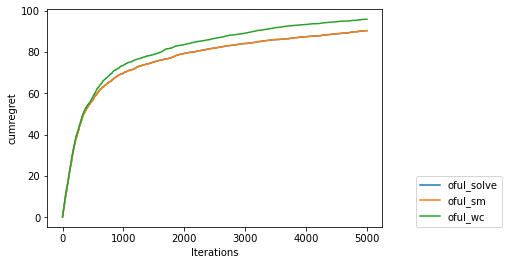

In [7]:
nu.compare('../logs', ['oful_solve', 'oful_sm', 'oful_wc'], 'cumregret', [seed])

## Smallest eigenvalue

In [8]:
d = 3000
A = np.random.normal(size=(d, d))

In [9]:
start = time.time()
_, sv, _ = np.linalg.svd(A)
mineig = sv[-1]**2
print(time.time() - start)
print(mineig)

6.829829931259155
3.993426097130166e-05


In [10]:
start = time.time()
eigv = np.linalg.eigvals(np.matmul(A, A.T))
mineig2 = np.min(eigv)
print(time.time() - start)
print(mineig2)
assert np.allclose(mineig2, mineig)

6.174109935760498
3.993426027881901e-05
